In [1]:
import Pkg
Pkg.activate(".")
#Pkg.instantiate()

  Activating project at `~/Documents/programming/SigmaCampNext-2025`


In [3]:
Pkg.add("Catalyst")
Pkg.add("OrdinaryDiffEqTsit5")
Pkg.add("Plots")

   Resolving package versions...
   Installed FiniteDiff ──── v2.28.0
   Installed ADTypes ─────── v1.17.0
   Installed SymbolicUtils ─ v3.31.0
   Installed SciMLBase ───── v2.109.0
   Installed Symbolics ───── v6.51.0
   Installed Catalyst ────── v15.0.8
    Updating `~/Documents/programming/SigmaCampNext-2025/Project.toml`
  [47edcb42] ↑ ADTypes v1.16.0 ⇒ v1.17.0
⌃ [13f3f980] ↓ CairoMakie v0.15.5 ⇒ v0.13.10
  [479239e8] + Catalyst v15.0.8
⌃ [f27b6e38] ↓ Polynomials v4.1.0 ⇒ v4.0.21
    Updating `~/Documents/programming/SigmaCampNext-2025/Manifest.toml`
  [47edcb42] ↑ ADTypes v1.16.0 ⇒ v1.17.0
⌃ [13f3f980] ↓ CairoMakie v0.15.5 ⇒ v0.13.10
  [479239e8] + Catalyst v15.0.8
  [95dc2771] - ComputePipeline v0.1.4
  [6a86dc24] ↑ FiniteDiff v2.27.0 ⇒ v2.28.0
⌅ [a98d9a8b] ↓ Interpolations v0.16.1 ⇒ v0.15.1
⌅ [ee78f7c6] ↓ Makie v0.24.5 ⇒ v0.22.10
⌅ [20f20a25] + MakieCore v0.9.5
⌃ [f27b6e38] ↓ Polynomials v4.1.0 ⇒ v4.0.21
  [0bca4576] ↑ SciMLBase v2.108.0 ⇒ v2.109.0
  [431bcebd] + SciMLPublic v1.

In [4]:
using Catalyst, OrdinaryDiffEqTsit5, Plots

In [5]:
t=default_t()
@parameters k_on switch_time k_off
@species A(t) B(t)

rxs = [(@reaction k_on, A--> B), (@reaction k_off, B-->A)]

2-element Vector{Reaction{Any, Int64}}:
 k_on, A --> B
 k_off, B --> A

In [6]:
discrete_events = (t == switch_time) => [k_on ~ 0.0]

u0 = [:A => 10.0, :B => 0.0]
tspan = (0.0, 4.0)
p = [k_on => 100.0, switch_time => 2.0, k_off => 10.0]

3-element Vector{Pair{Num, Float64}}:
        k_on => 100.0
 switch_time => 2.0
       k_off => 10.0

In [7]:
@named osys = ReactionSystem(rxs, t, [A, B], [k_on, k_off, switch_time]; discrete_events)
osys = complete(osys)

oprob = ODEProblem(osys, u0, tspan, p)
sol = solve(oprob, Tsit5(); tstops = 2.0)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 105-element Vector{Float64}:
 0.0
 9.999000050004998e-7
 1.0998900055005497e-5
 0.00011098890055505546
 0.0007570567404369951
 0.0022249154214992036
 0.004390001422588812
 0.007140471256485504
 0.010622255936105232
 0.014751593689173406
 0.019550535489083063
 0.024970422414049454
 0.031039523905385117
 ⋮
 2.7208807003809596
 2.8003768086767398
 2.881757156194859
 2.9656216780270475
 3.0532547501064764
 3.146742142432296
 3.2488808233338484
 3.363171433429317
 3.4941191900007773
 3.6479365191555844
 3.833749337719228
 4.0
u: 105-element Vector{Vector{Float64}}:
 [10.0, 0.0]
 [9.999000154981985, 0.0009998450180154056]
 [9.989007750931561, 0.01099224906843915]
 [9.889685870094032, 0.11031412990596748]
 [9.273608574602152, 0.7263914253978488]
 [8.026432035586408, 1.9735679644135928]
 [6.518103969091188, 3.481896030908813]
 [5.053761036622382, 4.946238963377619]
 [3.7349923945949604, 6.2650076054050405]
 [2.703367

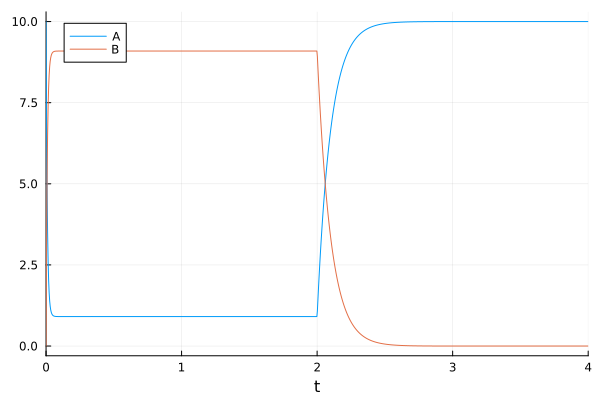

In [8]:
plot(sol)

In [11]:
#Pkg.add("ModelingToolkit")
#Pkg.add("DifferentialEquations")
Pkg.add("Optimization")
Pkg.add("SciMLSensitivity")
Pkg.add("OptimizationOptimJL")
Pkg.add("Optim")

   Resolving package versions...
    Updating `~/Documents/programming/SigmaCampNext-2025/Project.toml`
  [7f7a1694] + Optimization v4.5.0
    Updating `~/Documents/programming/SigmaCampNext-2025/Manifest.toml`
  [88cd18e8] + ConsoleProgressMonitor v0.1.2
⌃ [82cc6244] ↓ DataInterpolations v8.5.0 ⇒ v8.2.0
  [5be7bae1] + LBFGSB v0.4.1
  [1d6d02ad] + LeftChildRightSiblingTrees v0.2.1
  [7f7a1694] + Optimization v4.5.0
⌃ [bca83a33] + OptimizationBase v2.7.0
  [33c8b6b6] + ProgressLogging v0.1.5
⌅ [9f842d2f] + SparseConnectivityTracer v0.6.21
  [5d786b92] + TerminalLoggers v0.1.7
  [81d17ec3] + L_BFGS_B_jll v3.0.1+0
        Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated -m`
Precompiling project...
    490.0 ms  ✓ L_BFGS_B_jll
    502.2 ms  ✓ LBFGSB
   1007.9 ms  ✓ DataInterpolations
   1871.7 ms  ✓ SparseConnectivityTracer
    744.1 m

In [12]:
using Optimization, SciMLSensitivity, OptimizationOptimJL, Optim

In [13]:
@variables t 
@parameters k_on k_off α
@species A(t) B(t)

rxs = [(@reaction α*k_on, A-->B), (@reaction k_off, B-->A)]

switch_time = 2.0
discrete_events = (t == switch_time) => [k_on ~ 0.0]

tspan = (0.0, 4.0)

alpha_list = [0.1, 0.2, 0.3, 0.4]
results_list = []

Any[]

In [14]:
u0 = [:A => 10.0, :B => 0.0]
p_real = [k_on => 100.0, k_off => 10.0, α => 1.0]
@named osys = ReactionSystem(rxs, t, [A, B], [k_on, k_off, α]; discrete_events)
osys = complete(osys)
oprob = ODEProblem(osys, u0, tspan, p_real)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 4.0)
u0: 2-element Vector{Float64}:
 10.0
  0.0

In [15]:
sample_times = range(tspan[1]; stop = tspan[2], length = 1001) 

for alpha in alpha_list
    p_real = [k_on => 100.0, k_off => 10.0, α => alpha]
    oprobr = remake(oprob, p=p_real)
    sol_real = solve(oprobr, Tsit5(); tstops = sample_times)

    push!(results_list, sol_real(sample_times))
end

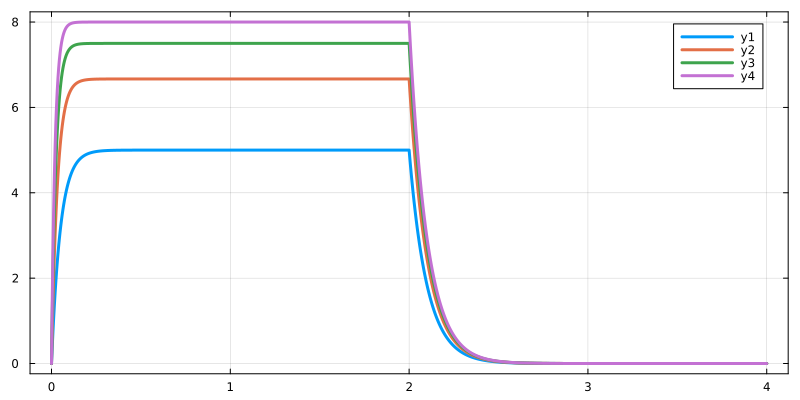

In [16]:
default(; lw = 3, framestyle = :box, size = (800, 400))
plot(sample_times, results_list[1][2,:])
plot!(sample_times, results_list[2][2,:])
plot!(sample_times, results_list[3][2,:])
plot!(sample_times, results_list[4][2,:])

In [17]:
sample_vals = []
for result in results_list
    sample_val = Array(result)
    sample_val .*= (1 .+ .1 * rand(Float64, size(sample_val)) .- .05)
    push!(sample_vals, sample_val)
end

In [18]:
for val in sample_vals
    scatter!(sample_times, sample_vals; color = [:blue :red], legend = nothing)
end

function optimise_p(pinit, tend)
    function loss(p, _)
        newtimes = filter(<=(tend), sample_times)
        solutions = []
        for alpha in alpha_list
            newprob = remake(oprob; tspan = (0.0, tend), p = [k_on => p[1],k_off => p[2],α => alpha])
            sol = Array(solve(newprob, Tsit5(); saveat = newtimes, tstops = switch_time))
            push!(solutions,sol[2,:])
        end
        loss = 0
        for (idx, solution) in enumerate(solutions)
            loss += sum(abs2, p[3]*solution .- sample_vals[idx][1:size(sol,2)])
        end

        return loss
    end
    optf = OptimizationFunction(loss)
    
    optprob = OptimizationProblem(optf, pinit)
    sol = solve(optprob, Optim.NelderMead())

    return sol.u
end


optimise_p (generic function with 1 method)

In [25]:
p_estimate = optimise_p([10.0, 10.0, 2.0], 4.0)

3-element Vector{Float64}:
 1167.104742059776
   -0.0016228195657558046
    0.4993297563424782

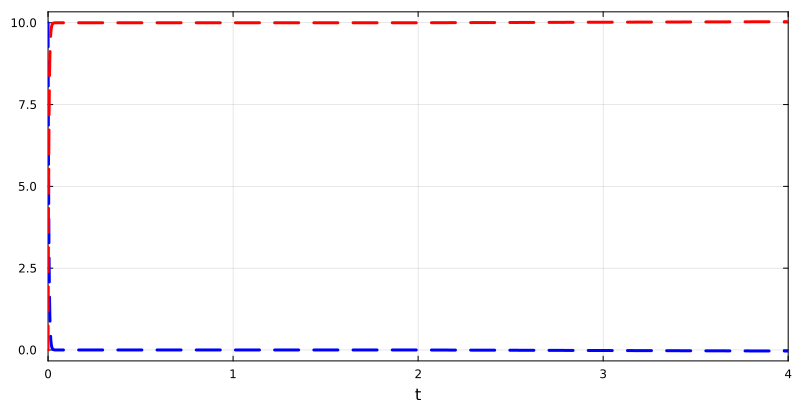

In [23]:
#newprob = remake(oprob, tspan = (0.0, 4.0), p = p_estimate)
newprob = remake(oprob; tspan = (0.0, 4.0), p = [k_on => p_estimate[1],k_off => p_estimate[2],α => 0.2])
newsol = solve(newprob, Tsit5(); tstops = switch_time)

#plot(sol_real; legend = nothing, color = [:darkblue :darkred])
#scatter!(sample_times, sample_vals'; color = [:darkblue :darkred], legend = nothing)

plot(newsol; legend = nothing, color = [:blue :red], linestyle = :dash)